In [186]:
# Importing necessary libraries for data processing and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [187]:
# Displaying the first few rows of the cleaned dataset to check the changes
import pandas as pd

df = pd.read_csv("walk_data_meta.csv")
df.head()


,sub_id,datestring,filename,speed_w,age,Height,Weight,Gender,DominantLeg,InjDefn,...,SpecInjury2,Activities,Level,YrsRunning,RaceDistance,RaceTimeHrs,RaceTimeMins,RaceTimeSecs,YrPR,NumRaces
0,100433,2010-10-05 13:22,20101005T132240.json,1.113930,53,NaN,NaN,Unknown,NaN,Training volume/intensity affected,...,NaN,"walking, horseback riding, strength training",Recreational,13.0,10k,NaN,NaN,NaN,NaN,NaN
1,100434,2010-11-17 13:22,20101117T132240.json,1.107742,51,NaN,NaN,Female,NaN,Training volume/intensity affected,...,NaN,"running, swimming",Recreational,20.0,Casual Runner (no times),NaN,NaN,NaN,NaN,NaN
2,100537,2012-07-03 10:25,20120703T102550.json,1.121041,255,173.1,67.6,Female,Right,2 workouts missed in a row,...,NaN,"hiking, power walking, pilates",Recreational,2.0,Casual Runner (no times),NaN,NaN,NaN,NaN,NaN
3,100560,2012-07-17 10:37,20120717T103748.json,1.322763,33,179.3,83.0,Female,Right,No injury,...,NaN,Yoga,Recreational,NaN,Casual Runner (no times),NaN,NaN,NaN,NaN,NaN
4,101481,2012-07-17 10:50,20120717T105021.json,1.120394,32,176.3,58.6,Female,NaN,No injury,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [188]:
# Displaying the first few rows of the cleaned dataset to check the changes
df['can_play_next_match'] = df['InjDefn'].fillna('No injury').apply(lambda x: 1 if "no injury" in x.lower() else 0)

print("Target value counts:")
print(df['can_play_next_match'].value_counts())
df.head()

Target value counts:
can_play_next_match
0    1092
1     996
Name: count, dtype: int64


,sub_id,datestring,filename,speed_w,age,Height,Weight,Gender,DominantLeg,InjDefn,...,Activities,Level,YrsRunning,RaceDistance,RaceTimeHrs,RaceTimeMins,RaceTimeSecs,YrPR,NumRaces,can_play_next_match
0,100433,2010-10-05 13:22,20101005T132240.json,1.113930,53,NaN,NaN,Unknown,NaN,Training volume/intensity affected,...,"walking, horseback riding, strength training",Recreational,13.0,10k,NaN,NaN,NaN,NaN,NaN,0
1,100434,2010-11-17 13:22,20101117T132240.json,1.107742,51,NaN,NaN,Female,NaN,Training volume/intensity affected,...,"running, swimming",Recreational,20.0,Casual Runner (no times),NaN,NaN,NaN,NaN,NaN,0
2,100537,2012-07-03 10:25,20120703T102550.json,1.121041,255,173.1,67.6,Female,Right,2 workouts missed in a row,...,"hiking, power walking, pilates",Recreational,2.0,Casual Runner (no times),NaN,NaN,NaN,NaN,NaN,0
3,100560,2012-07-17 10:37,20120717T103748.json,1.322763,33,179.3,83.0,Female,Right,No injury,...,Yoga,Recreational,NaN,Casual Runner (no times),NaN,NaN,NaN,NaN,NaN,1
4,101481,2012-07-17 10:50,20120717T105021.json,1.120394,32,176.3,58.6,Female,NaN,No injury,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [189]:
# Dropping unnecessary columns that are not required for the model
# These include identifiers, injury details, and race performance data
cols_to_drop = [
    'sub_id', 'datestring', 'filename', 'InjDefn', 'InjJoint', 'InjSide', 'SpecInjury',
    'InjDuration', 'InjJoint2', 'InjSide2', 'SpecInjury2', 'Activities',
    'RaceDistance', 'RaceTimeHrs', 'RaceTimeMins', 'RaceTimeSecs', 'YrPR', 'NumRaces'
]
df.drop(columns=cols_to_drop, errors='ignore', inplace=True)

df.drop_duplicates(inplace=True)

print("Data shape after dropping unwanted columns and duplicates:", df.shape)
df.head()

Data shape after dropping unwanted columns and duplicates: (2088, 9)


,speed_w,age,Height,Weight,Gender,DominantLeg,Level,YrsRunning,can_play_next_match
0,1.113930,53,NaN,NaN,Unknown,NaN,Recreational,13.0,0
1,1.107742,51,NaN,NaN,Female,NaN,Recreational,20.0,0
2,1.121041,255,173.1,67.6,Female,Right,Recreational,2.0,0
3,1.322763,33,179.3,83.0,Female,Right,Recreational,NaN,1
4,1.120394,32,176.3,58.6,Female,NaN,NaN,NaN,1


In [190]:
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df.head()

,speed_w,age,Height,Weight,YrsRunning,can_play_next_match,Gender_Male,Gender_Unknown,DominantLeg_Left,DominantLeg_Right,Level_Recreational
0,1.113930,53,NaN,NaN,13.0,0,False,True,False,False,True
1,1.107742,51,NaN,NaN,20.0,0,False,False,False,False,True
2,1.121041,255,173.1,67.6,2.0,0,False,False,False,True,True
3,1.322763,33,179.3,83.0,NaN,1,False,False,False,True,True
4,1.120394,32,176.3,58.6,NaN,1,False,False,False,False,False


In [191]:
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
df.head()

,speed_w,age,Height,Weight,YrsRunning,can_play_next_match,Gender_Male,Gender_Unknown,DominantLeg_Left,DominantLeg_Right,Level_Recreational
0,-0.486621,0.667982,NaN,NaN,-0.210357,0,False,True,False,False,True
1,-0.521177,0.529888,NaN,NaN,-0.177035,0,False,False,False,False,True
2,-0.446912,14.615443,0.095792,-0.209551,-0.262721,0,False,False,False,True,True
3,0.679556,-0.712955,0.245287,0.692970,NaN,1,False,False,False,True,True
4,-0.450525,-0.782002,0.172951,-0.736998,NaN,1,False,False,False,False,False


In [192]:
# Dropping unnecessary columns that are not required for the model
# These include identifiers, injury details, and race performance data
cols_to_drop = [
 'Gender_Unknown','DominantLeg_Left'
]
df.drop(columns=cols_to_drop, errors='ignore', inplace=True)
df.head()

,speed_w,age,Height,Weight,YrsRunning,can_play_next_match,Gender_Male,DominantLeg_Right,Level_Recreational
0,-0.486621,0.667982,NaN,NaN,-0.210357,0,False,False,True
1,-0.521177,0.529888,NaN,NaN,-0.177035,0,False,False,True
2,-0.446912,14.615443,0.095792,-0.209551,-0.262721,0,False,True,True
3,0.679556,-0.712955,0.245287,0.692970,NaN,1,False,True,True
4,-0.450525,-0.782002,0.172951,-0.736998,NaN,1,False,False,False


In [203]:
# prompt: i want to refill the 'NaN' missing value using meanimputation

import numpy as np
# Assuming 'df' is your DataFrame
numeric_cols = df.select_dtypes(include=np.number).columns

# Iterate through numerical columns and fill NaN values with the mean
for col in numeric_cols:
    df[col].fillna(df[col].mean(), inplace=True)

# Alternatively, you can use the fillna method with a dictionary
# to specify the imputation method for each column if needed

# Example:
# df.fillna({
#     'column1': df['column1'].mean(),
#     'column2': df['column2'].median(),
# }, inplace=True)

df.head()


<ipython-input-203-7954714ab289>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


,speed_w,age,Height,Weight,YrsRunning,can_play_next_match,Gender_Male,DominantLeg_Right,Level_Recreational
0,-0.486621,0.667982,1.263187e-16,5.635935e-16,-0.210357,0,False,False,True
1,-0.521177,0.529888,1.263187e-16,5.635935e-16,-0.177035,0,False,False,True
2,-0.446912,14.615443,9.579228e-02,-2.095508e-01,-0.262721,0,False,True,True
3,0.679556,-0.712955,2.452865e-01,6.929696e-01,0.000000,1,False,True,True
4,-0.450525,-0.782002,1.729506e-01,-7.369978e-01,0.000000,1,False,False,False


In [204]:
# Printing the shape of the dataset after cleaning




print(df['can_play_next_match'].value_counts())



can_play_next_match
0    1092
1     996
Name: count, dtype: int64


In [205]:
# Dropping unnecessary columns that are not required for the model
# These include identifiers, injury details, and race performance data
X = df.drop('can_play_next_match', axis=1)
y = df['can_play_next_match']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)

print("Test set shape:", X_test.shape)

Training set shape: (1670, 8)
Test set shape: (418, 8)


In [206]:
# Printing the shape of the dataset after cleaning
print("Original training target distribution:")
print(y_train.value_counts())

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("\nAfter applying SMOTE, training target distribution:")
print(pd.Series(y_train_res).value_counts())

Original training target distribution:
can_play_next_match
0    873
1    797
Name: count, dtype: int64

After applying SMOTE, training target distribution:
can_play_next_match
1    873
0    873
Name: count, dtype: int64


In [207]:
# prompt: give me the code to save the cleaned dataset

# Save the cleaned dataset to a new CSV file
df.to_csv("cleaned_walk_data_meta.csv", index=False)


In [208]:
print(df.head())

    speed_w        age        Height        Weight  YrsRunning  \
0 -0.486621   0.667982  1.263187e-16  5.635935e-16   -0.210357   
1 -0.521177   0.529888  1.263187e-16  5.635935e-16   -0.177035   
2 -0.446912  14.615443  9.579228e-02 -2.095508e-01   -0.262721   
3  0.679556  -0.712955  2.452865e-01  6.929696e-01    0.000000   
4 -0.450525  -0.782002  1.729506e-01 -7.369978e-01    0.000000   

   can_play_next_match  Gender_Male  DominantLeg_Right  Level_Recreational  
0                    0        False              False                True  
1                    0        False              False                True  
2                    0        False               True                True  
3                    1        False               True                True  
4                    1        False              False               False  


In [180]:
# prompt: i want to download the cleaned and ready dataset  separately


from google.colab import files
df.to_csv('cleaned_dataset.csv', encoding = 'utf-8-sig')
files.download('cleaned_dataset.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [213]:


# Reload the cleaned dataset
cleaned_data_path = "cleaned_walk_data_meta.csv"
df_cleaned = pd.read_csv(cleaned_data_path)

print(df_cleaned.head())

# Define correct target column
target_column = "can_play_next_match"  # Ensure the correct column name

# Define features (X) and target variable (y)
X = df_cleaned.drop(columns=[target_column])  # Features
y = df_cleaned[target_column]  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Manually testing different SVM configurations
svm_configs = [
    {"C": 0.1, "kernel": "rbf", "gamma": "scale"},
    {"C": 1, "kernel": "rbf", "gamma": "scale"},
    {"C": 10, "kernel": "rbf", "gamma": 0.1},
    {"C": 10, "kernel": "rbf", "gamma": 1},
]

# Store results for manual tuning
svm_results = []

# Train and evaluate each SVM configuration
for config in svm_configs:
    svm_model = SVC(C=config["C"], kernel=config["kernel"], gamma=config["gamma"], probability=True)
    svm_model.fit(X_train, y_train)

    # Training and Testing Accuracy
    train_acc = accuracy_score(y_train, svm_model.predict(X_train))
    test_acc = accuracy_score(y_test, svm_model.predict(X_test))

    svm_results.append({
        "Model": f"SVM (C={config['C']}, gamma={config['gamma']})",
        "Training Accuracy": train_acc,
        "Testing Accuracy": test_acc
    })

# Convert results to DataFrame
svm_results_df = pd.DataFrame(svm_results)

# Print results instead of using ace_tools
print("\n===== Manually Tuned SVM Performance =====")
print(svm_results_df)

# Save to CSV for further analysis
svm_results_df.to_csv("svm_tuning_results.csv", index=False)
print("\nSVM tuning results saved as 'svm_tuning_results.csv'.")

# Train the final SVM model with selected parameters
final_svm_model = SVC(C=1, kernel="rbf", gamma="scale", probability=True)
final_svm_model.fit(X_train, y_train)

# Evaluate the final SVM model
train_acc = accuracy_score(y_train, final_svm_model.predict(X_train))
test_acc = accuracy_score(y_test, final_svm_model.predict(X_test))

# Display the final SVM model performance
print("\n===== Final SVM Model Performance =====")
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy: {test_acc:.4f}")

# Save final model results to CSV
final_svm_results_df = pd.DataFrame([{
    "Model": "Final SVM (C=1, gamma=scale)",
    "Training Accuracy": train_acc,
    "Testing Accuracy": test_acc
}])

final_svm_results_df.to_csv("final_svm_model_performance.csv", index=False)
print("\nFinal SVM model results saved as 'final_svm_model_performance.csv'.")


    speed_w        age        Height        Weight  YrsRunning  \
0 -0.486621   0.667982  1.263187e-16  5.635935e-16   -0.210357   
1 -0.521177   0.529888  1.263187e-16  5.635935e-16   -0.177035   
2 -0.446912  14.615443  9.579228e-02 -2.095508e-01   -0.262721   
3  0.679556  -0.712955  2.452865e-01  6.929696e-01    0.000000   
4 -0.450525  -0.782002  1.729506e-01 -7.369978e-01    0.000000   

   can_play_next_match  Gender_Male  DominantLeg_Right  Level_Recreational  
0                    0        False              False                True  
1                    0        False              False                True  
2                    0        False               True                True  
3                    1        False               True                True  
4                    1        False              False               False  

===== Manually Tuned SVM Performance =====
                      Model  Training Accuracy  Testing Accuracy
0  SVM (C=0.1, gamma=scale)     

In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_original[['age', 'Height', 'Weight', 'YrsRunning']])

# Reverse transformation to get original values
df_original[['age', 'Height', 'Weight', 'YrsRunning']] = scaler.inverse_transform(df_scaled)
print(df_original.head(10).to_string(index=False))


 Unnamed: 0   speed_w       age    Height    Weight  YrsRunning  can_play_next_match  Gender_Male  DominantLeg_Right  Level_Recreational
          0 -0.741970  0.757860 -0.015094 -0.110941    1.795392                    0        False               True                True
          3  1.574096 -0.696973  0.907279  0.875030    0.288220                    1        False               True                True
          4 -0.670281 -0.769715  0.573891 -0.975562    0.288220                    1        False               True                True
          5 -0.678460  0.612376  0.207164 -0.315720   -1.821821                    0         True               True                True
          7 -0.683869 -0.696973  1.140651  1.443860   -0.013215                    0         True              False                True
          8 -0.684598 -1.497131  0.096035 -0.186785   -0.013215                    1        False               True                True
         10 -0.716919 -1.497131 -0.126224

In [57]:
print(df.head(10).to_string(index=False))



  speed_w       age    Height    Weight  YrsRunning  can_play_next_match  Gender_Male  DominantLeg_Right  Level_Recreational
-0.741970  0.757860 -0.015094 -0.110941    1.795392                    0        False               True                True
 1.574096 -0.696973  0.907279  0.875030    0.288220                    1        False               True                True
-0.670281 -0.769715  0.573891 -0.975562    0.288220                    1        False               True                True
-0.678460  0.612376  0.207164 -0.315720   -1.821821                    0         True               True                True
-0.683869 -0.696973  1.140651  1.443860   -0.013215                    0         True              False                True
-0.684598 -1.497131  0.096035 -0.186785   -0.013215                    1        False               True                True
-0.716919 -1.497131 -0.126224 -0.641849    0.288220                    1        False              False                True


In [58]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the original dataset
df_original = pd.read_csv("cleaned_dataset.csv")

# Ensure the correct column names
print("Column Names in Dataset:", df_original.columns)

# If scaling was applied, we need to reverse it
scaler = StandardScaler()

# Select numerical columns for scaling (if applied)
num_cols = ['age', 'Height', 'Weight', 'YrsRunning']

# Fit scaler on the current dataset and attempt inverse transform
try:
    df_scaled = scaler.fit_transform(df_original[num_cols])
    df_original[num_cols] = scaler.inverse_transform(df_scaled)
except Exception as e:
    print("Error in inverse transformation:", e)

# Print the first 10 rows with original values
print("\n===== First 10 Rows (Original Values) =====")
print(df_original.head(10).to_string(index=False))



Column Names in Dataset: Index(['Unnamed: 0', 'speed_w', 'age', 'Height', 'Weight', 'YrsRunning',
       'can_play_next_match', 'Gender_Male', 'DominantLeg_Right',
       'Level_Recreational'],
      dtype='object')

===== First 10 Rows (Original Values) =====
 Unnamed: 0   speed_w       age    Height    Weight  YrsRunning  can_play_next_match  Gender_Male  DominantLeg_Right  Level_Recreational
          0 -0.741970  0.757860 -0.015094 -0.110941    1.795392                    0        False               True                True
          3  1.574096 -0.696973  0.907279  0.875030    0.288220                    1        False               True                True
          4 -0.670281 -0.769715  0.573891 -0.975562    0.288220                    1        False               True                True
          5 -0.678460  0.612376  0.207164 -0.315720   -1.821821                    0         True               True                True
          7 -0.683869 -0.696973  1.140651  1.443860   

In [59]:
# prompt: i want to know count of my dataset

import pandas as pd

# Load the dataset (assuming it's already loaded as 'df_cleaned' in your code)
# If not loaded, uncomment the line below:
# df_cleaned = pd.read_csv("cleaned_dataset (2).csv")

# Get the number of rows (data points) in the dataset
dataset_count = len(df_cleaned)

# Print the count
print(f"The dataset has {dataset_count} rows.")


The dataset has 1534 rows.


Confusion Matrix:
[[199  20]
 [ 73 126]]


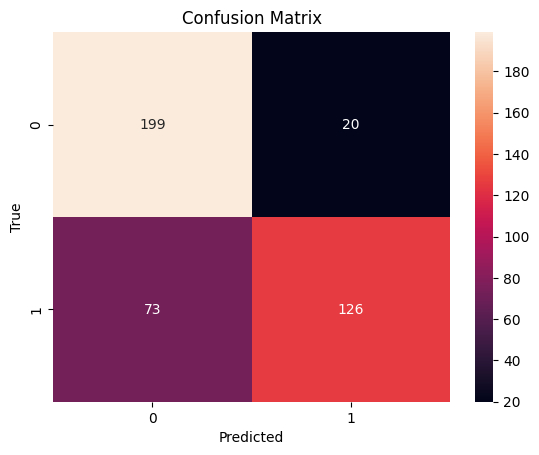

In [214]:
# prompt: i want to get confussion metrix

import matplotlib.pyplot as plt
# Assuming you have already trained your final_svm_model and have y_test and X_test

y_pred = final_svm_model.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# You can also visualize the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()



In [215]:
# prompt: i want to download pkl file for connect to my backend

import pickle
from google.colab import files

# Assuming 'final_svm_model' is your trained SVM model
# Save the model to a pickle file
filename = 'final_svm_model.pkl'
pickle.dump(final_svm_model, open(filename, 'wb'))

# Download the pickle file
files.download(filename)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [63]:

# Option B: Explicitly drop the "Unnamed: 0" column if it appears
df = pd.read_csv("cleaned_dataset.csv")
if "Unnamed: 0" in df.columns:
    df =columns=["Unnamed: 0"]
    print(df)


['Unnamed: 0']
